# TASK 1 DATA SCIENCE

# TITANIC SURVIVAL PREDICTION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
data=pd.read_csv("C:/Users/USER/Downloads/titanic.zip")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.shape

(891, 12)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data=data.drop(columns='Cabin',axis=1)

In [9]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [10]:
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

In [11]:
data['Fare'].fillna(data['Fare'].mode()[0],inplace=True)

In [12]:
data.isnull().sum().sum()

0

In [13]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

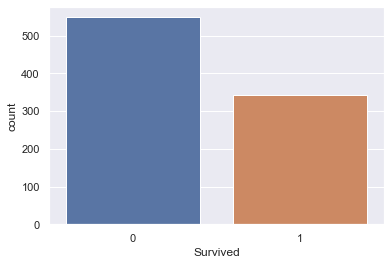

In [16]:
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Sex', ylabel='count'>

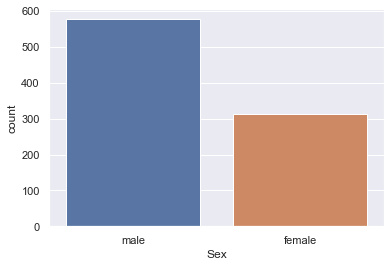

In [17]:
sns.countplot(x='Sex',data=data)

<Axes: xlabel='Pclass', ylabel='count'>

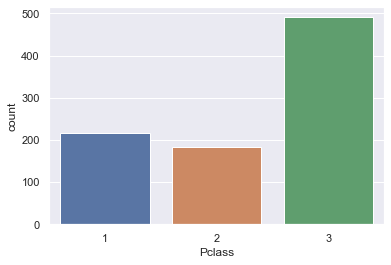

In [40]:
sns.countplot(x='Pclass',data=data)

In [42]:
data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [43]:
data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [21]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [22]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [23]:
X=data.drop(columns=['PassengerId','Name','Ticket'],axis=1)

In [24]:
Y=data['Survived']

In [25]:
print(X)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500         0
1           1       1    1  38.000000      1      0  71.2833         1
2           1       3    1  26.000000      0      0   7.9250         0
3           1       1    1  35.000000      1      0  53.1000         0
4           0       3    0  35.000000      0      0   8.0500         0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000         0
887         1       1    1  19.000000      0      0  30.0000         0
888         0       3    1  29.699118      1      2  23.4500         0
889         1       1    0  26.000000      0      0  30.0000         1
890         0       3    0  32.000000      0      0   7.7500         2

[891 rows x 8 columns]


In [26]:

print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(891, 8) (712, 8) (179, 8)


In [29]:
model=LogisticRegression()

In [30]:
model.fit(X_train,Y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
X_train_prediction=model.predict(X_train)

In [32]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [33]:
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [34]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  1.0


In [35]:
X_test_prediction=model.predict(X_test)

In [36]:
print(X_test_prediction)

[1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]


In [37]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [38]:
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 1.0
